## Libraries :


In [7]:
# Magic command below to enable interactivity in the JupyterLab interface 
%matplotlib ipympl 
# Some basic imports that are useful 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation

## init () and update ():
This is used to initialize the plot, and then update the plot during the transformation. 

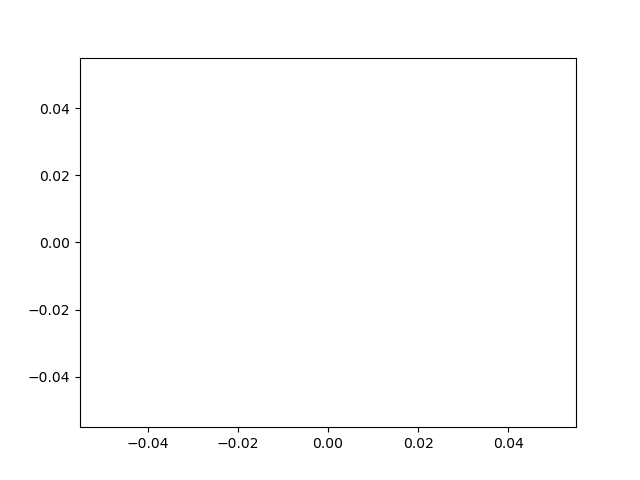

In [8]:
fig, ax = plt.subplots() 
xdata, ydata = [], [] 
ln, = ax.plot([], [], 'red')
total_data = []

def init(): 
    ax.set_xlim(-1.2, 1.2) 
    ax.set_ylim(-1.2, 1.2) 
    
    return ln, 

def update(frame): 
    count_1 = int(frame)    

    if(int(frame) >= 5): # To get the reverse animation of figures, i.e from 8 to 7 to 6 to 5 to 4 to 3
        count_2 = 5 - int(frame) 
        xc, yc, xs, ys = polygon_coordinates(count_2 + 8, count_2 + 7,t)
        xdata, ydata = morph(xs, ys, xc, yc, frame - count_1)
        total_data.append(xdata)
        total_data.append(ydata)
        ln.set_data(total_data[-2], total_data[-1])
        total_data.clear()
        return ln, 
    
  
    # To get the forward animation of figures, i.e from 3 to 4 to 5 to 6 to 7 to 8
    elif(frame >= count_1 and frame <= (count_1 + 1)): 
        xc, yc, xs, ys = polygon_coordinates(count_1 + 3, count_1 + 4, t)
        xdata, ydata = morph(xs, ys, xc, yc, frame - count_1)
        total_data.append(xdata)
        total_data.append(ydata)
        ln.set_data(total_data[-2], total_data[-1])
        total_data.clear()
        return ln, 

## Mapping function ():
To map the vertex of a polygon to the coming polygon. <br><br>
To understand the below function, I have taken the example of conversion from triangle (3) to square (4).<br>
The same is valid for the conversions of other polygons also.<br>
Since in the animation, vertices are being split, each vertex of the triangle gets mapped to two of the vertices of square.<br>
Considering the x coordinates, we can say that :(I am moving in the anticlockwise direction, and the starting coordinate(1,0))
gets repeated<br>
&emsp; a] 1 gets mapped to 1<br>
&emsp; b] -0.5 gets mapped to 0, and -1 <br>
&emsp; c] -0.5 gets mapped to -1, and 0 (The other vertex of triangle with x coordinate as -0.5)<br>
&emsp; d] 1 gets mapped to 1<br>
The y-coordinates also gets respectively mapped.<br>

<br>
The variables x_before, y_before, x_after, y_after are calculated using this mapping.

In [9]:
# m = first polygon, with number of sides = m
# n = second polygon, with number of sides = n
# x_before, y_before = to map with x_after, y_after, with the help of  m_x, m_y, n_x, n_y.
# General case is for m < n. The 'check' variable is used to check when m > n, and make the respective changes

def mapping(m, n, m_x, m_y, n_x, n_y, t, check):
    total = int(len(t)/m)
    x_before = []
    y_before = []
    x_after = []
    y_after = []
    for i in range(0, len(m_x), 2):
        x_before.extend(np.linspace(m_x[i], m_x[i+1], total))
        y_before.extend(np.linspace(m_y[i], m_y[i+1], total))
        x_after.extend(np.linspace(n_x[i], n_x[i+1], total))
        y_after.extend(np.linspace(n_y[i], n_y[i+1], total))
        
    
    x_before = np.array(x_before)
    x_after = np.array(x_after)
    y_before = np.array(y_before)
    y_after = np.array(y_after)
    
    if(check == 1): 
# Here the values of x_before and x_after, and y_before and y_after gets interchanged
# This is done when m < n
        d_x_before = x_before
        d_y_before = y_before
        x_before = x_after
        y_before = y_after
        x_after = d_x_before
        y_after = d_y_before
    else:
        pass
    return x_before, y_before, x_after, y_after

## point_split() :
It is used to find proper splitting of the coordinates that will be used by the mapping function above.

In [10]:
def point_split(m, n, m_x_coord, m_y_coord, n_x_coord, n_y_coord, t):
    if(len(m_x_coord) > len(n_x_coord)): # To get the value of 'check', depending on whether m<n or m>n
        check = 1 
        dupli_x = n_x_coord
        n_x_coord = m_x_coord
        m_x_coord = dupli_x
        dupli_y = n_y_coord
        n_y_coord = m_y_coord
        m_y_coord = dupli_y
    
    else:
        check = 0 

#  m_x, m_y, n_x, n_y are useful for mapping in the above function
# I have updated the values in m_x, m_y, n_x, and n_y in the way they will be mapped
    m_x = []
    m_y = []
    n_x = []
    n_y = []
    
    m_x.append(1)
    m_y.append(0)
    
    for i in range(1, len(m_x_coord)):
        m_x.append(m_x_coord[i])
        m_x.append(m_x_coord[i])
        m_y.append(m_y_coord[i])
        m_y.append(m_y_coord[i])
        
    m_x.append(1)
    m_y.append(0)
    
    for i in range(len(n_x_coord)):
        n_x.append(n_x_coord[i])
        n_y.append(n_y_coord[i])
        
        if(i>=2 and i<=len(n_x_coord)-2):
            n_x.append(n_x_coord[i])
            n_y.append(n_y_coord[i])
    n_x.append(1)
    n_y.append(0)
    

#     print('mx coord ', m_x_coord)
#     print('nx coord ', n_x_coord)
#     print('mx ', m_x)
#     print('nx ', n_x)
#     print('my ', m_y)
#     print('ny ', n_y)
    
    return mapping(m, n, m_x, m_y, n_x, n_y, t, check)

## polygon_coordinates () :
This function finds the x and y coordinates of both the polygon that will be used during a particular transformation

In [11]:
# m_x_coord, m_y_coord - list containing all the x and y coordinate of 1st polygon
# n_x_coord, n_y_coord - list containing all the x and y coordinate of 2nd polygon
def polygon_coordinates(m, n, t):
    angle_m = 2 * np.pi/m
    angle_n = 2 * np.pi/n
    
    m_x_coord = []
    m_y_coord = []
    n_x_coord = []
    n_y_coord = []
    
    for i in range(m):
        m_x_coord.append(np.cos(angle_m * i))
        m_y_coord.append(np.sin(angle_m * i))
    
    for i in range(n):
        n_x_coord.append(np.cos(angle_n * i))
        n_y_coord.append(np.sin(angle_n * i))
        
    return point_split(m, n, m_x_coord, m_y_coord, n_x_coord, n_y_coord, t)

## morph ():
This is used in morphing the polygon from one type to another

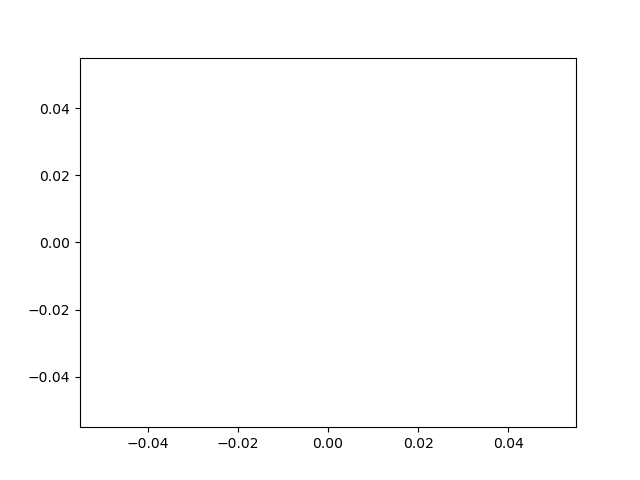

In [12]:
def morph(x1, y1, x2, y2, alpha): # The morphing function is the same as the one used in week 5 presentation
    xm = alpha * x1 + (1-alpha) * x2 
    ym = alpha * y1 + (1-alpha) * y2 
    return xm, ym 

t = np.linspace(0, 2 * np.pi, 840) # Total points should be the lcm of 3, 4, 5, 6, 7, 8
if len(t) % 4 != 0: 
    raise BaseException("Number of points should be multiple of 3, 4, 5, 6, 7, 8 ")
    

# The forward and reversed transformation done in the update function dependent on the value of frames
# The total number of transformations are 10, first 5 are the forward one and the other 5 are the reversed one

# The value of frames and interval can be changed as per need to alter the speed of transformation.
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 1000), init_func = init, blit=True, interval=10,repeat=True)
plt.show()